# `scipy.spatial` 

scipy.spatial can compute triangulations, Voronoi diagrams, and convex hulls of a set of points, by leveraging the `Qhull` library.

Moreover, it contains `KDTree` implementations for nearest-neighbor point queries, and utilities for distance computations in various metrics.

## Triangulations (qhull)

In [1]:
%matplotlib inline

import numpy as np
from scipy.spatial import Delaunay, ConvexHull, Voronoi
import matplotlib.pyplot as plt


points = np.random.rand(30, 2)   # 30 random points in 2-D

tri = Delaunay(points)
hull = ConvexHull(points)
voronoi = Voronoi(points)

In [2]:
print ("Neighbour triangles\n",tri.neighbors[0:5])
print ("Simplices\n", tri.simplices[0:5])
print ("Points\n", points[tri.simplices[0:5]])

Neighbour triangles
 [[15  1  8]
 [ 0  5 21]
 [-1 17  3]
 [24  2 18]
 [-1 22 31]]
Simplices
 [[ 7 11 14]
 [10  7 14]
 [24 16 21]
 [24 13 16]
 [15 26  8]]
Points
 [[[0.3875605  0.11408164]
  [0.73200103 0.20162976]
  [0.66115012 0.4748392 ]]

 [[0.31177077 0.38567188]
  [0.3875605  0.11408164]
  [0.66115012 0.4748392 ]]

 [[0.09397379 0.65409095]
  [0.11509652 0.85580981]
  [0.0874031  0.61681644]]

 [[0.09397379 0.65409095]
  [0.18934679 0.71836198]
  [0.11509652 0.85580981]]

 [[0.62780812 0.81622587]
  [0.7457113  0.94292677]
  [0.37794856 0.98443842]]]


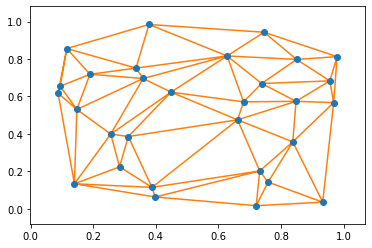

In [3]:
from scipy.spatial import delaunay_plot_2d
delaunay_plot_2d(tri)
pass

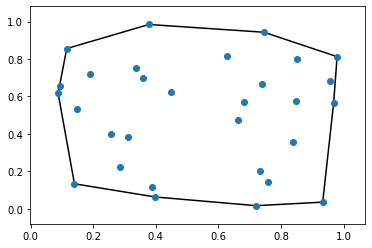

In [4]:
from scipy.spatial import convex_hull_plot_2d

convex_hull_plot_2d(hull)
pass

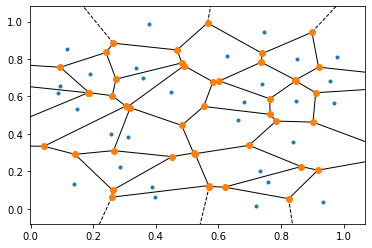

In [5]:
from scipy.spatial import voronoi_plot_2d

voronoi_plot_2d(voronoi)
pass

## KDtree

Allows very fast point to point searches.

In [6]:
from scipy.spatial import KDTree, cKDTree

In [7]:
tree = cKDTree(points)

print (tree.data)

[[0.84820664 0.57379357]
 [0.97940361 0.8125879 ]
 [0.96845417 0.56700068]
 [0.95608244 0.68319573]
 [0.33648482 0.75140123]
 [0.28398271 0.22377273]
 [0.13965171 0.13314101]
 [0.3875605  0.11408164]
 [0.37794856 0.98443842]
 [0.75871306 0.14200773]
 [0.31177077 0.38567188]
 [0.73200103 0.20162976]
 [0.84980769 0.79774284]
 [0.18934679 0.71836198]
 [0.66115012 0.4748392 ]
 [0.62780812 0.81622587]
 [0.11509652 0.85580981]
 [0.68024241 0.57097897]
 [0.35936248 0.69578438]
 [0.73817976 0.66891091]
 [0.14731726 0.53044987]
 [0.0874031  0.61681644]
 [0.44818084 0.62277269]
 [0.25564484 0.39872739]
 [0.09397379 0.65409095]
 [0.83783323 0.35719751]
 [0.7457113  0.94292677]
 [0.7206832  0.01617724]
 [0.93337024 0.03508018]
 [0.39786852 0.06266039]]


In [8]:
%%timeit

tree.query((0.5,0.5))

28.6 µs ± 86.5 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
test_points = np.random.rand(1000, 2)   # 1000 random points in 2-D

In [10]:
%%timeit

tree.query(test_points) 

566 µs ± 201 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
more_points = np.random.rand(10000, 2)   # 1000 random points in 2-D

big_tree = KDTree(more_points)

In [12]:
%%timeit

KDTree(more_points)

4.34 ms ± 12.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%%timeit

big_tree.query(test_points) 

958 µs ± 419 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Compare this to the brute-force version


At what point does it make sense to use kdTree and not brute-force distance tests ?

The brute force method takes a fixed time per sample point and a fixed cost associated with the N-neighbour distance computation (but this can be vectorised efficiently).

In [14]:
# Brute force version

def brute_force_distance(pts, spt):

    d = pts - spt
    d2 = d**2
    distances2 = np.einsum('ij->i',d2)
    
    nearest = np.argsort(distances2)[0]
    
    return np.sqrt(distances2[nearest]), nearest

# print np.einsum('ij->i',distances2)

In [15]:
print (brute_force_distance(more_points, (0.0,0.0)))
print (big_tree.query((0.0,0.0)))

(0.00618035486810953, 5309)
(0.00618035486810953, 5309)


In [16]:
%%timeit

brute_force_distance(points, (0.5,0.5))
brute_force_distance(points, (0.0,0.0))
brute_force_distance(points, (0.25,0.25))

41.2 µs ± 104 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [17]:
%%timeit

tree.query(np.array([(0.5,0.5), (0.0,0.0), (0.25,0.25)]))

32.9 µs ± 164 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [18]:
%%timeit

brute_force_distance(more_points, (0.5,0.5))
# brute_force_distance(more_points, (0.0,0.0))
# brute_force_distance(more_points, (0.25,0.25))

1.02 ms ± 282 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [19]:
%%timeit

big_tree.query(np.array([(0.5,0.5), (0.0,0.0), (0.25,0.25)]))

36.3 µs ± 122 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
